<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_12_UK_Cars_Dataset_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='blue' style='font-size: 30px;'>UK Cars Dataset - Data Visualization Project</font>

##<font color='blue' style='font-size: 30px;'>1.   Business case</font>

A certain - hypothetical - company would like to get to know the used car market in Great Britain to decide whether it is worth exploring or not.

To do so, it obtained a database and asked a data scientist for an analysis, who must trace the characteristics of that market in as much detail as possible.

<hr></hr>

##<font color='blue' style='font-size: 30px;'>2.   Obtaining data</font>

*   Dataset source: KAGGLE, "*CARS DATASET*"

*   Available in: https://www.kaggle.com/datasets/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

<hr></hr>

##<font color='blue' style='font-size: 30px;'>3.   Importing database</font>

In [ ]:
# importing Python libraries

import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# accessing the Google Cloud

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# accessing the CSV file and creating the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/cars_dataset.csv')

<hr></hr>

##<font color='blue' style='font-size: 30px;'>4.   Knowing database and its size</font>

In [ ]:
# viewing the first lines of the dataset

df.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi


In [ ]:
# checking dataset data number

begin = df.shape[1] * df.shape[0]

print ("The number of records is: ", df.shape[0])
print ("The number of variables is: ", df.shape[1])
print ("The total number of data is: ", df.shape[1] * df.shape[0])

The number of records is:  72435
The number of variables is:  10
The total number of data is:  724350


In [ ]:
# how many unique data each variable has

df.nunique()

model             146
year               25
price           10418
transmission        4
mileage         35743
fuelType            5
tax                47
mpg               177
engineSize         32
Make                7
dtype: int64

In [ ]:
# how many null data is there in the dataset

df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [ ]:
# key dataset statistics

df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
year,72435.0,2017.0,2.0,1996.0,2016.0,2017.0,2019.0,2020.0
price,72435.0,16580.0,9299.0,495.0,10175.0,14495.0,20361.0,145000.0
mileage,72435.0,23177.0,21332.0,1.0,7202.0,17531.0,32449.0,323000.0
tax,72435.0,117.0,64.0,0.0,30.0,145.0,145.0,580.0
mpg,72435.0,56.0,17.0,0.0,48.0,55.0,63.0,471.0
engineSize,72435.0,2.0,1.0,0.0,1.0,2.0,2.0,7.0


Important information for each numerical variable:



> **year**: mean and median are the same; data refer to 25 years


> **price**: mean and median are close; there are 3 orders of magnitude between the smallest and largest value


> **mileage**: mean and median are close; there are 5 orders of magnitude between the smallest and largest value


> **tax**: mean and median are not that far apart; there are tax-free vehicles


> **mpg** (miles per gallon): mean and median are almost the same; the values 0 and 471 are strange



> **engineSize**: mean and median are the same;

<hr></hr>

##<font color='blue' style='font-size: 30px;'>5.   Removing outliers - Numerical Variables</font>

This is an important step, as outliers distort statistical evaluations. Taking them out is a good way to find the central tendency of the sample.

###<font color='blue' style='font-size: 30px;'>5.1 Variable 'year'</font>

Text(0.5, 0, 'Year')

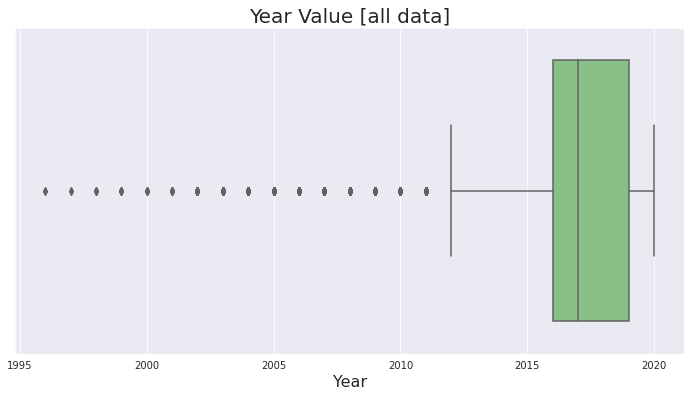

In [ ]:
# checking outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.year)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Year Value [all data]', fontsize=20)
ax.set_xlabel('Year', fontsize=16)

In [ ]:
# removing outliers

valor = df.year

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df[ (df.year <= limite_inferior) | (df.year >= limite_superior)].index

df.drop(indexNames , inplace=True)

Text(0.5, 0, 'Year')

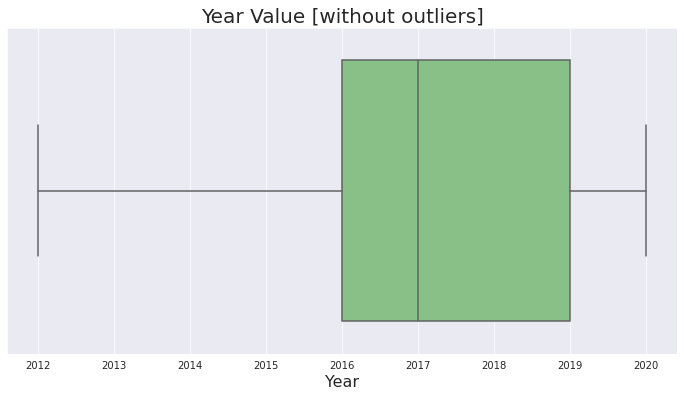

In [ ]:
# checking the result

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.year)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Year Value [without outliers]', fontsize=20)
ax.set_xlabel('Year', fontsize=16)

**Considerations**: after removing the outliers, there was only an interval of 8 years
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.2 Variable 'price'</font>

Text(0.5, 0, 'Price')

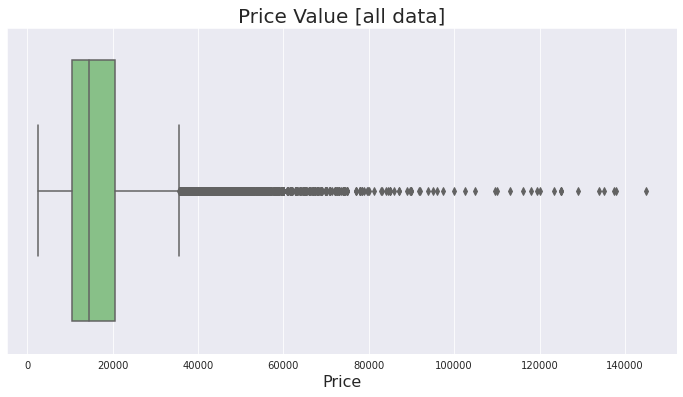

In [ ]:
# checking outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.price)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Price Value [all data]', fontsize=20)
ax.set_xlabel('Price', fontsize=16)

In [ ]:
# removing outliers

valor = df.price

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df[ (df.price <= limite_inferior) | (df.price >= limite_superior)].index

df.drop(indexNames , inplace=True)

Text(0.5, 0, 'Price')

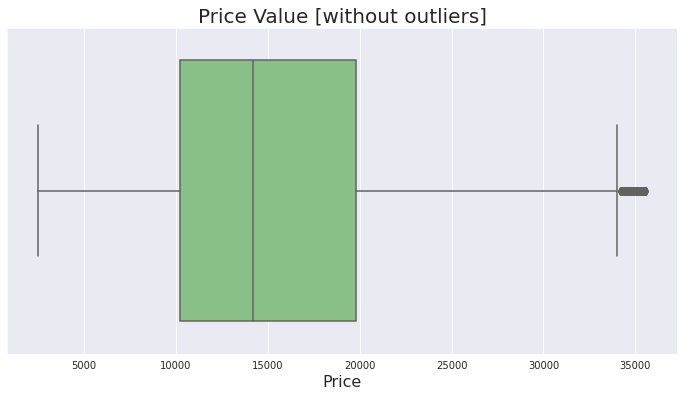

In [ ]:
# checking the result

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.price)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Price Value [without outliers]', fontsize=20)
ax.set_xlabel('Price', fontsize=16)

**Considerations**: In fact, only the high values of the cars were taken out, starting at £34275
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.3 Variable 'mileage'</font>

Text(0.5, 0, 'Mileage')

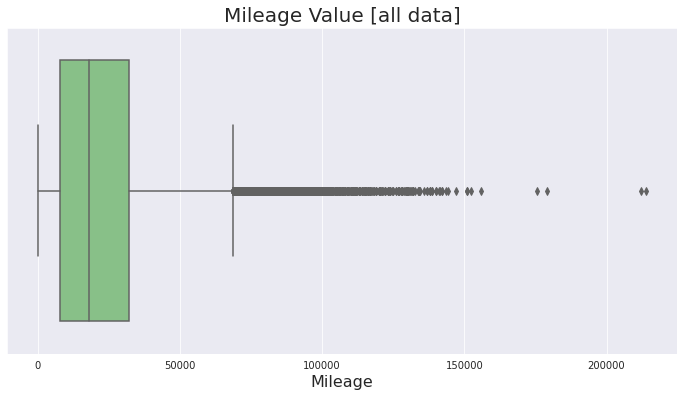

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.mileage)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Mileage Value [all data]', fontsize=20)
ax.set_xlabel('Mileage', fontsize=16)

In [ ]:
valor = df.mileage

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df[ (df.mileage <= limite_inferior) | (df.mileage >= limite_superior)].index

df.drop(indexNames , inplace=True)

Text(0.5, 0, 'Mileage')

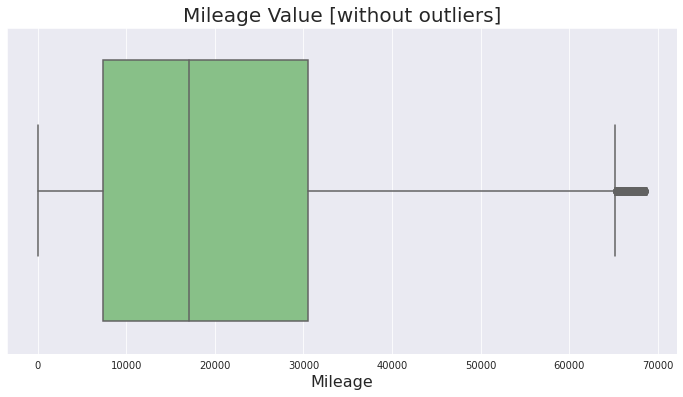

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.mileage)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Mileage Value [without outliers]', fontsize=20)
ax.set_xlabel('Mileage', fontsize=16)

**Considerations**: cars over 65k miles have been withdrawn
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.3 Variable 'tax'</font>

Text(0.5, 0, 'Tax')

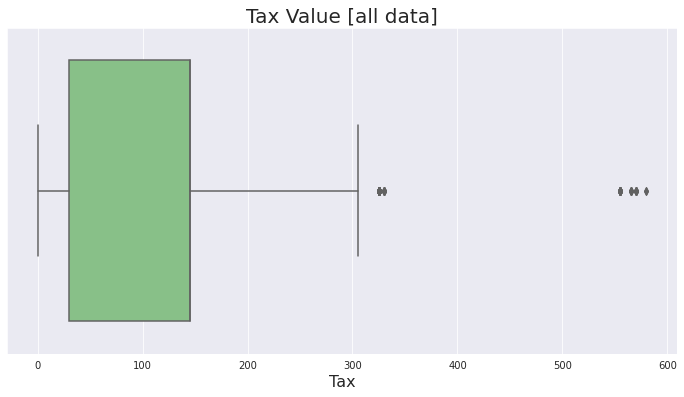

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.tax)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Tax Value [all data]', fontsize=20)
ax.set_xlabel('Tax', fontsize=16)

**Considerations**: I decided to keep all vehicles in this variable, as there were few outliers
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.3 Variable 'mpg - Miles per Gallon'</font>

Text(0.5, 0, 'Miles per Gallon')

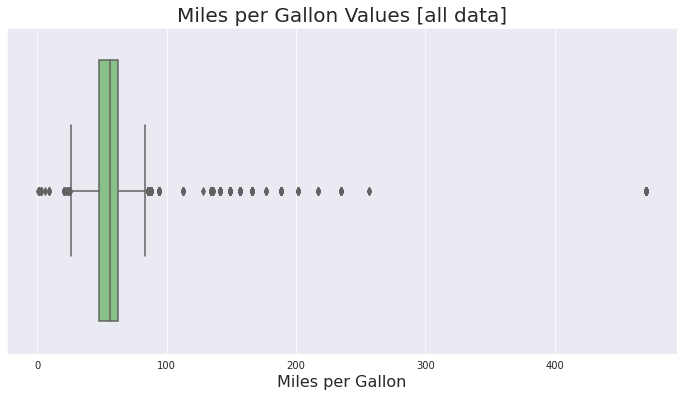

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.mpg)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Miles per Gallon Values [all data]', fontsize=20)
ax.set_xlabel('Miles per Gallon', fontsize=16)

In [ ]:
valor = df.mpg

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df[ (df.mpg <= limite_inferior) | (df.mpg >= limite_superior)].index

df.drop(indexNames , inplace=True)

Text(0.5, 0, 'Miles per Gallon')

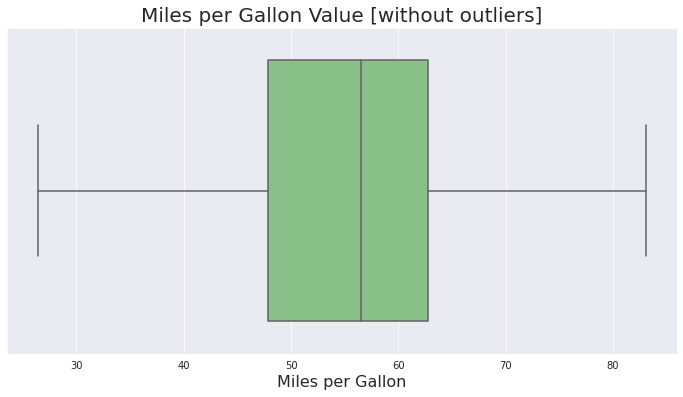

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.mpg)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Miles per Gallon Value [without outliers]', fontsize=20)
ax.set_xlabel('Miles per Gallon', fontsize=16)

**Considerations**: at first, I thought about keeping cars with low mileage, but as there are few, I preferred to remove them along with the high mileage ones.
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.3 Variable 'engineSize'</font>

Text(0.5, 0, 'Engine Size')

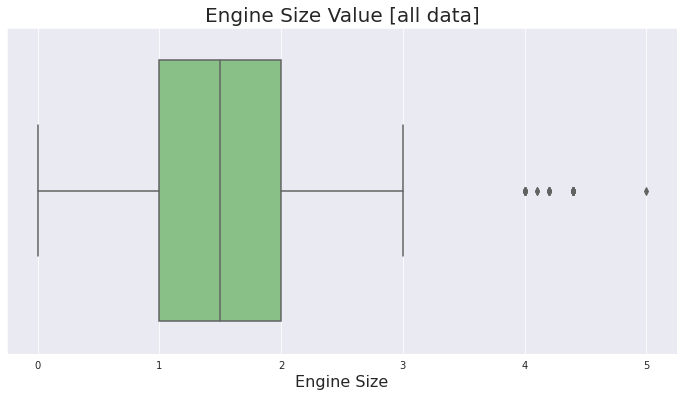

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.engineSize)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Engine Size Value [all data]', fontsize=20)
ax.set_xlabel('Engine Size', fontsize=16)

In [ ]:
valor = df.engineSize

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df[ (df.engineSize <= limite_inferior) | (df.engineSize >= limite_superior)].index

df.drop(indexNames , inplace=True)

Text(0.5, 0, 'Engine Size')

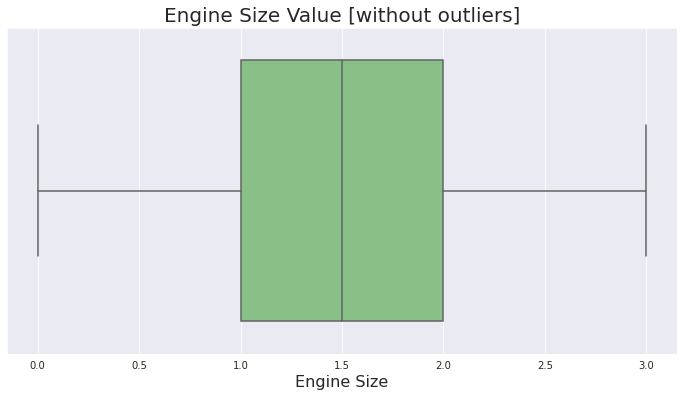

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df.engineSize)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Engine Size Value [without outliers]', fontsize=20)
ax.set_xlabel('Engine Size', fontsize=16)

**Considerations**: I decided to remove all outliers.
<hr></hr>

###<font color='blue' style='font-size: 30px;'>5.4 Results after cleaning the database</font>

In [ ]:
# analyzing the statistical information after removing the data from the database

df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
year,65247.0,2017.0,2.0,2012.0,2016.0,2017.0,2019.0,2020.0
price,65247.0,15754.0,6766.0,2470.0,10400.0,14495.0,19950.0,35600.0
mileage,65247.0,20506.0,15909.0,1.0,7318.0,17000.0,30382.0,68704.0
tax,65247.0,116.0,60.0,0.0,125.0,145.0,145.0,555.0
mpg,65247.0,56.0,10.0,27.0,48.0,56.0,63.0,83.0
engineSize,65247.0,2.0,0.0,0.0,1.0,2.0,2.0,3.0


In [ ]:
# checking new dataset data number

print ("Now, the number of records is: ", df.shape[0])

current = df.shape[1] * df.shape[0]
difference = begin - current

print ("The new total number of data is: ", current)
print ("The reduction of the database was: ", difference, "data.")


Now, the number of records is:  65247
The new total number of data is:  652470
The reduction of the database was:  71880 data.


<hr></hr>

##<font color='blue' style='font-size: 30px;'>6.   Histograms</font>

Distribution of events recorded throughout the database.

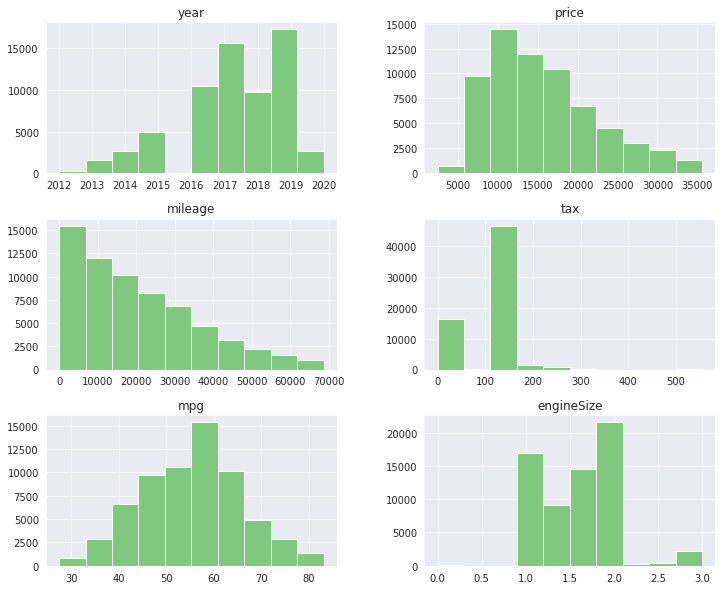

In [ ]:
# plotting the histograms of numerical variables

df.hist(figsize=(12,10))
sns.set_palette('Accent')
sns.set_style('darkgrid')

Looking at statistical information and boxplots, it would not be necessary to plot histograms, but this type of graph brings a more intuitive type of visualization, and more detailed info:



> **year**: as seen in the boxplot, the prevalence of data between 2016 and 2019 is clear; *this valuable information shows that Brits prefer cars up to 5 years old*


> **price**: *preferred prices are between 10 and 20 thousand*;


> **mileage**: <font color='red'>*it will be important to calculate the mileage per year of the cars to know if the British drive a lot*</font>;


> **tax**: according to the <font color='blue'>autoexpress* website </font>, the current annual flat rate of road tax is £165 (*very close to the median value of 145*);


> **mpg** (miles per gallon): consumption per mile (56 on average) is *the closest curve to the normal curve that I got*;



> **engineSize**: *1.0 to 2.0 cars are by far the favorites of the British*;


*https://www.autoexpress.co.uk/consumer-news/88361/ved-road-tax-how-does-car-tax-work-and-how-much-will-it-cost

<hr></hr>

###<font color='blue' style='font-size: 30px;'>6.1   Calculating the mileage per year of the cars</font>

This is an important parameter to be calculated in order to better understand the British automotive market.

In [ ]:
# creating a copy of the dataset

df2 = df.copy()

In [ ]:
# creating the columns 'year_difference' and 'mileage_per_year'

df2['year_difference'] = 2021 - df2['year']
df2['mileage_per_year'] =  df2['mileage'] / df2['year_difference']

df2.sample(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,year_difference,mileage_per_year
42640,Golf,2019,21995,Manual,10,Diesel,145.0,62.8,2.0,vw,2,5.0
54696,Corolla,2019,18290,Manual,3250,Petrol,145.0,39.2,1.2,toyota,2,1625.0
16383,4 Series,2019,29888,Manual,999,Petrol,145.0,46.3,2.0,BMW,2,499.5


In [ ]:
# evaluating statistical information

df2.mileage_per_year.describe().round()

count    65247.0
mean      4991.0
std       2994.0
min          0.0
25%       2789.0
50%       4672.0
75%       6811.0
max      29717.0
Name: mileage_per_year, dtype: float64

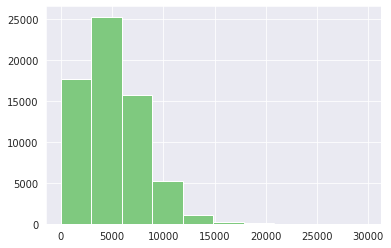

In [ ]:
# plotting the histogram of 'mileage_per_year'

df2.mileage_per_year.hist()

**Conclusion about mileage per year**: according to the government’s National Travel Survey*, in 2019, the average car in the UK drove 7400 miles. This sampling, however, shows an average of around 5k per year.

*https://www.themoneyedit.com/insurance/car-insurance/what-is-a-typical-annual-mileage-for-car-drivers-in-the-uk

<hr></hr>

**Partial general conclusion**: I believe that what numerical variables could offer is clear. Now, the important thing is to understand what categorical variables can add to the analysis. Get to work!

<hr></hr>

##<font color='blue' style='font-size: 30px;'>7.   Categorical variables</font>

###<font color='blue' style='font-size: 30px;'>7.1   Making small adjustments</font>

In [ ]:
# converting the 'year' variable to the proper format

df.year = pd.Series(pd.to_datetime(df.year, format='%Y'))
df.year = df.year.dt.year

In [ ]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65247 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         65247 non-null  object 
 1   year          65247 non-null  int64  
 2   price         65247 non-null  int64  
 3   transmission  65247 non-null  object 
 4   mileage       65247 non-null  int64  
 5   fuelType      65247 non-null  object 
 6   tax           65247 non-null  float64
 7   mpg           65247 non-null  float64
 8   engineSize    65247 non-null  float64
 9   Make          65247 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


###<font color='blue' style='font-size: 30px;'>7.2   Knowing the categorical variables</font>

####<font color='blue' style='font-size: 30px;'>7.2.1   Knowing the variable 'Make'</font>

In [ ]:
# evaluating brand names

df.Make.unique()

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

In [ ]:
# making adjustments

makes = {
    'audi' : 'Audi',
    'BMW': 'BMW',
    'Ford': 'Ford',
    'vw' : 'Volkswagen',
    'toyota': 'Toyota',
    'skoda': 'Skoda',
    'Hyundai': 'Hyundai'
}

In [ ]:
# adjusting the name of the brands correctly written

df.Make = df.Make.map(makes)
df.Make.unique()

array(['Audi', 'BMW', 'Ford', 'Volkswagen', 'Toyota', 'Skoda', 'Hyundai'],
      dtype=object)

####<font color='blue' style='font-size: 30px;'>7.2.2   Adding the countries of manufacture</font>

In [ ]:
# adjusting the dataset

map_dictionary ={'Audi' : "Germany", 'BMW' :"Germany", 'Ford' : "USA", 'Volkswagen' :"Germany",
                 'Toyota' : "Japan", 'Skoda' :"Czech Republic", 'Hyundai' : "South Korea"} 

df['makerCountry'] = df['Make'].map(map_dictionary)
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,makerCountry
15055,1 Series,2019,19250,Semi-Auto,6173,Diesel,145.0,67.3,2.0,BMW,Germany
63825,Kodiaq,2020,29890,Automatic,2500,Diesel,145.0,39.2,2.0,Skoda,Czech Republic
70712,Santa Fe,2017,19750,Semi-Auto,21891,Diesel,240.0,42.8,2.2,Hyundai,South Korea
62249,Fabia,2019,14295,Manual,2738,Petrol,145.0,60.1,1.0,Skoda,Czech Republic
71077,I30,2020,25995,Manual,1045,Petrol,145.0,34.0,2.0,Hyundai,South Korea


In [ ]:
# just checking the result

df.makerCountry.unique()

array(['Germany', 'USA', 'Japan', 'Czech Republic', 'South Korea'],
      dtype=object)

####<font color='blue' style='font-size: 30px;'>7.2.3 Variable 'year'</font>

Okay, this is not a categorical variable, but I wanted to analyze it with this set of graphs initially. Forgive me...

In [ ]:
# counting the number of cars per year

years = df.year.value_counts()
years

2019    17253
2017    15657
2016    10511
2018     9787
2015     4902
2020     2657
2014     2634
2013     1566
2012      280
Name: year, dtype: int64

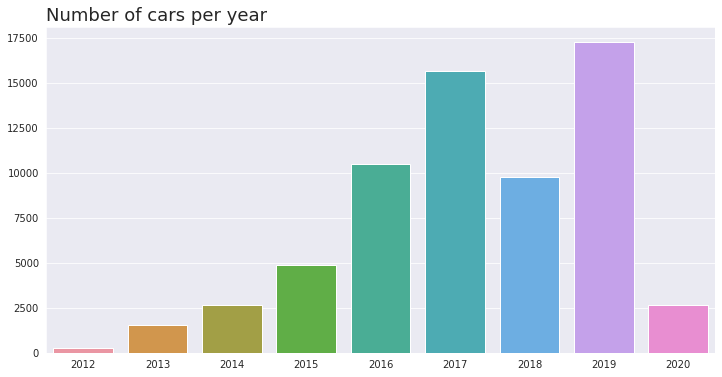

In [ ]:
# plotting the graph of the number of cars per year

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(years.index, years.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars per year", loc='left', fontsize=18)
ax = ax

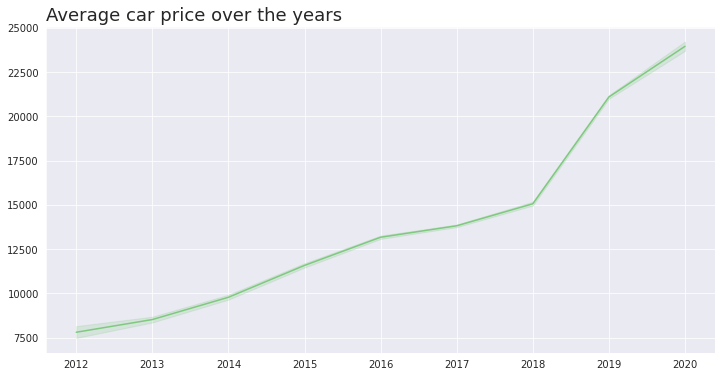

In [ ]:
# plotting the graph of car price by year

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='year', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Average car price over the years', loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

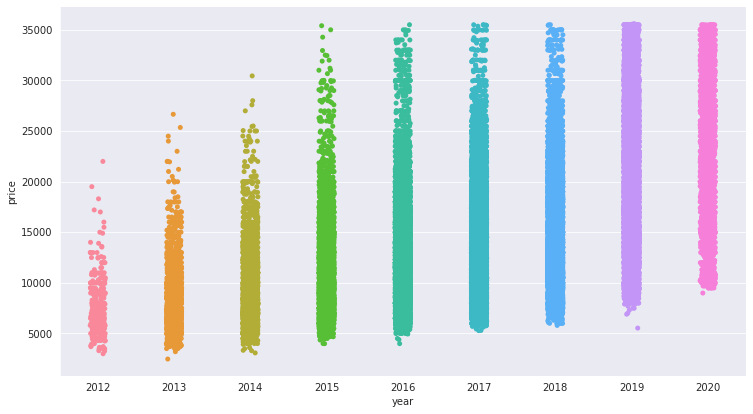

In [ ]:
# plotting car price density graph by year

ax = sns.catplot(x='year', y='price', data=df)
ax.figure.set_size_inches(12,6)

**Considerations**: interesting to note the brutal devaluation of cars from 2018 onwards.
<hr></hr>

####<font color='blue' style='font-size: 30px;'>7.2.4 Variable 'transmission'</font>

In [ ]:
# counting the number of cars per transmission type

trans = df.transmission.value_counts()
trans

Manual       40423
Semi-Auto    13452
Automatic    11368
Other            4
Name: transmission, dtype: int64

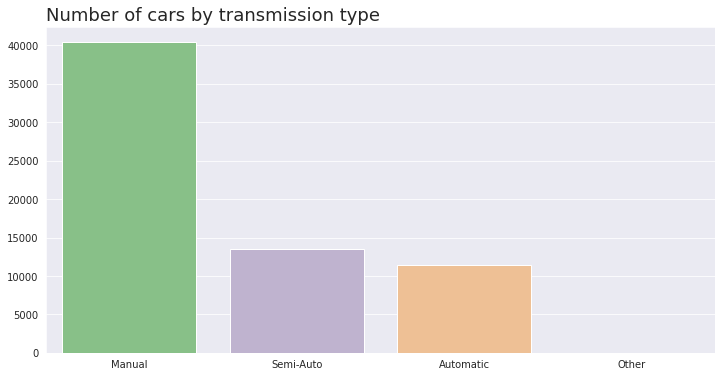

In [ ]:
# plotting the graph of the number of cars per transmission type

sns.set_style('darkgrid')
ax = sns.barplot(trans.index, trans.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars by transmission type", loc='left', fontsize=18)
ax = ax

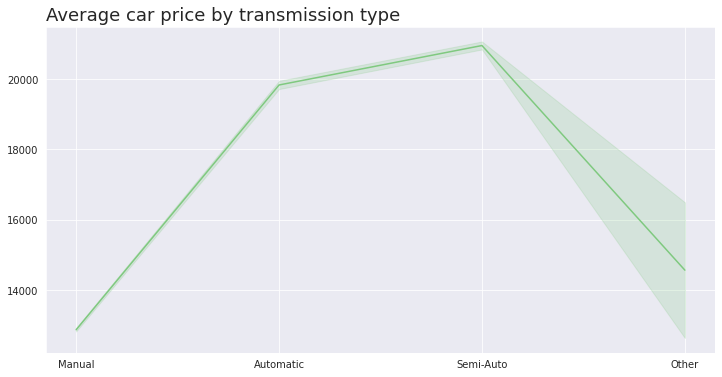

In [ ]:
# plotting the graph of car price by transmission type

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='transmission', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title("Average car price by transmission type", loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

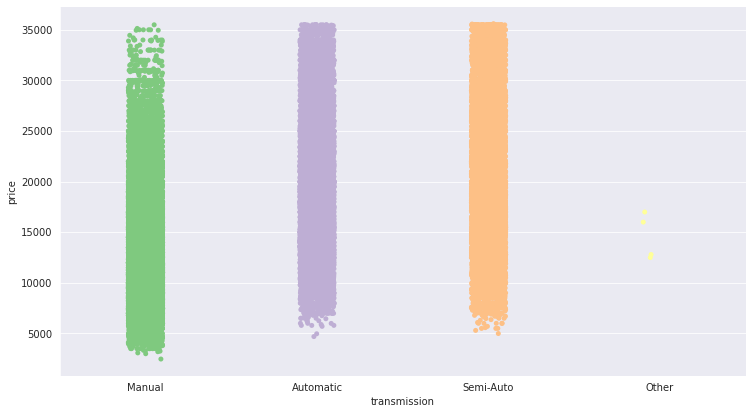

In [ ]:
# plotting car price density graph by transmission type

ax = sns.catplot(x='transmission', y='price', data=df)
ax.figure.set_size_inches(12,6)

**Considerations**: simple variable to understand: as for the transmission, the British don't mind driving manual transmission cars, if that implies a much lower price than other types.
<hr></hr>

####<font color='blue' style='font-size: 30px;'>7.2.5 Variable 'fuelType'</font>

In [ ]:
# counting the number of cars per fuel type

fuel = df.fuelType.value_counts()
fuel

Petrol      38400
Diesel      24574
Hybrid       2092
Other         179
Electric        2
Name: fuelType, dtype: int64

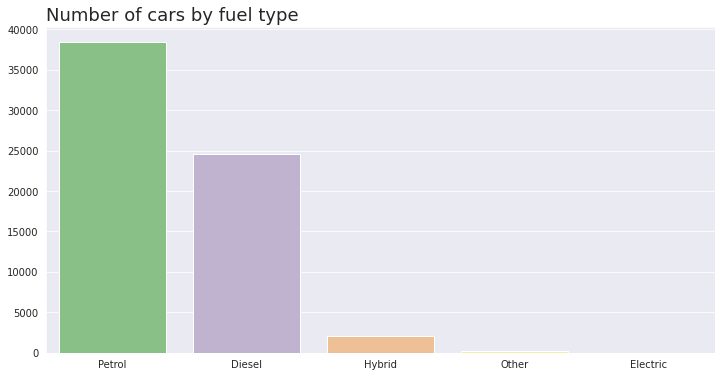

In [ ]:
# plotting the graph of the number of cars per fuel type

sns.set_style('darkgrid')
ax = sns.barplot(fuel.index, fuel.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars by fuel type", loc='left', fontsize=18)
ax = ax

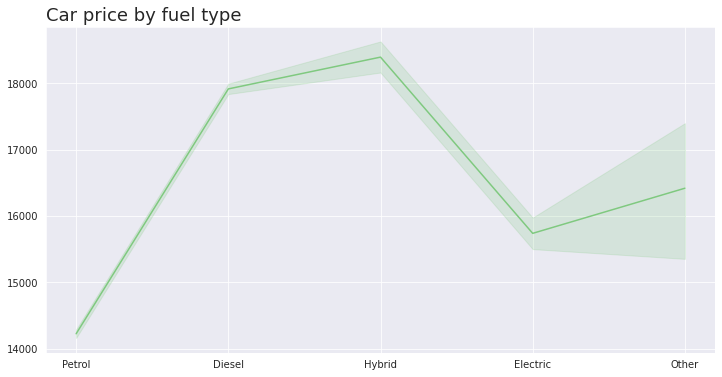

In [ ]:
# plotting the graph of car price by fuel type

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='fuelType', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title("Car price by fuel type", loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

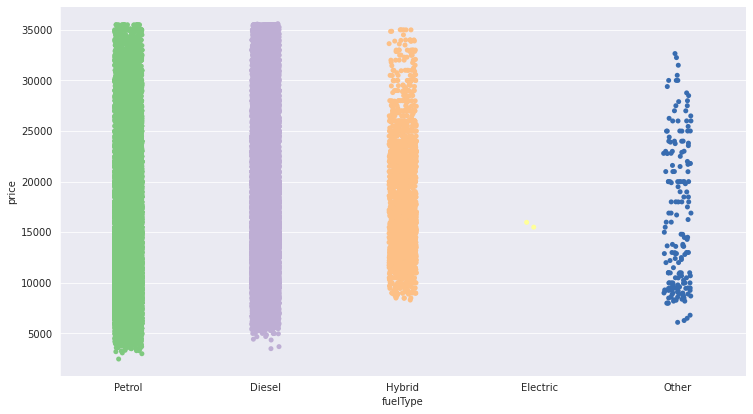

In [ ]:
# plotting car price density graph by fuel type

ax = sns.catplot(x='fuelType', y='price', data=df)
ax.figure.set_size_inches(12,6)

**Considerations**: several surprising pieces of information: 
1- gasoline cars are in greater quantity than diesel ones; 
2- the almost insignificant number of hybrid/electric cars.
It seems that the UK market is more of a price market than a technology market.
<hr></hr>

####<font color='blue' style='font-size: 30px;'>7.2.6 Variable 'engineSize'</font>

In [ ]:
# counting the number of cars per engine size type

engine = df.engineSize.value_counts()
engine

2.0    20346
1.0    16406
1.5     8656
1.6     5095
1.2     4821
1.4     3693
3.0     2215
1.8     1233
1.7      723
1.1      560
1.3      556
2.5      374
2.2      265
0.0      170
2.3       71
2.4       57
2.8        6
Name: engineSize, dtype: int64

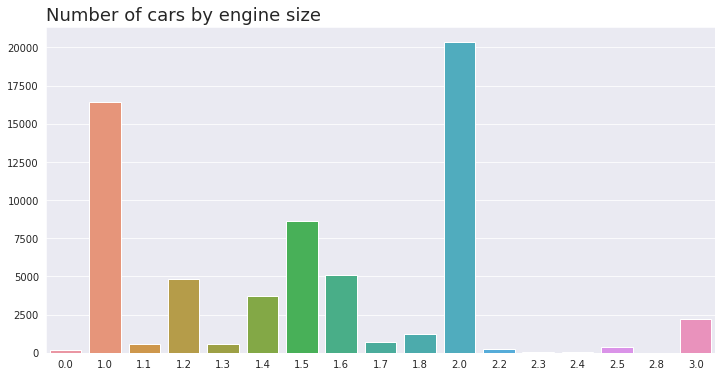

In [ ]:
# plotting the graph of the number of cars per engine size

sns.set_style('darkgrid')
ax = sns.barplot(engine.index, engine.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars by engine size", loc='left', fontsize=18)
ax = ax

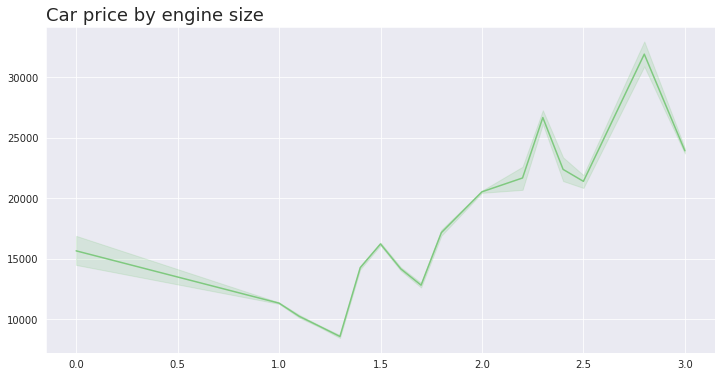

In [ ]:
# plotting the graph of car price by engine size

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='engineSize', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title("Car price by engine size", loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

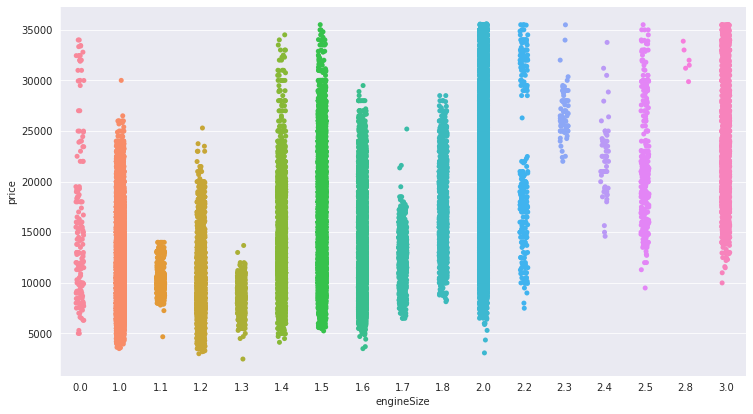

In [ ]:
# plotting car price density graph by engine size

ax = sns.catplot(x='engineSize', y='price', data=df)
ax.figure.set_size_inches(12,6)

**Considerations**: I confess that I was surprised by the high amount of 1.0 cars and the low amount of powerful cars.
<hr></hr>

####<font color='blue' style='font-size: 30px;'>7.2.7 Variable 'Make'</font>

In [ ]:
make = df.Make.value_counts()
make

Ford          17011
Volkswagen    14053
Audi           8827
BMW            8548
Skoda          6057
Toyota         6054
Hyundai        4697
Name: Make, dtype: int64

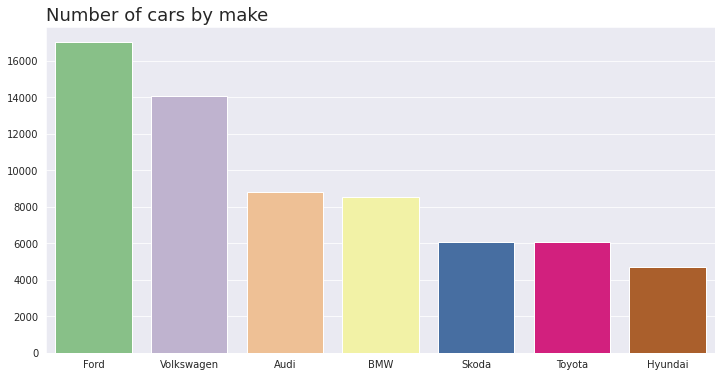

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(make.index, make.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars by make", loc='left', fontsize=18)
ax = ax

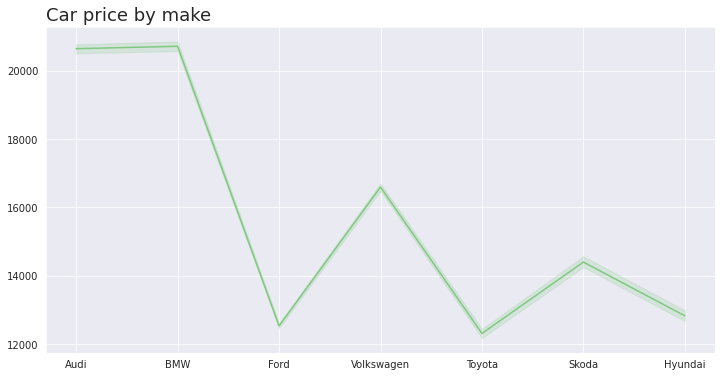

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Make', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title("Car price by make", loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

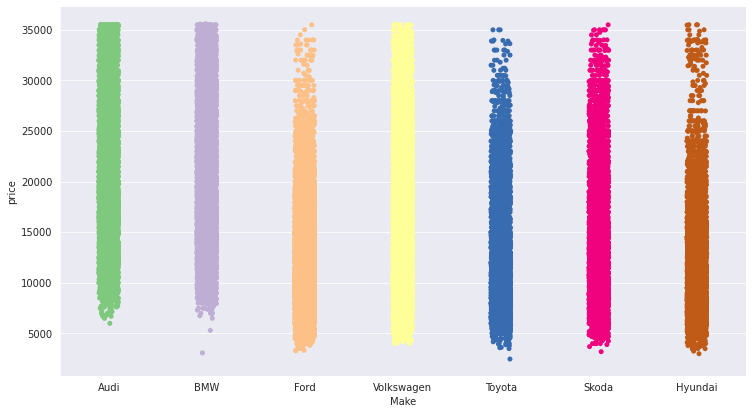

In [ ]:
ax = sns.catplot(x='Make', y='price', data=df)
ax.figure.set_size_inches(12,6)

In [ ]:
df.groupby(['Make']).mean()[['year', 'price', 'mpg', 'tax']].round()

,year,price,mpg,tax
Make,,,,
Audi,2017.0,20646.0,52.0,122.0
BMW,2017.0,20715.0,55.0,131.0
Ford,2017.0,12537.0,58.0,113.0
Hyundai,2017.0,12830.0,54.0,121.0
Skoda,2018.0,14403.0,56.0,119.0
Toyota,2017.0,12315.0,62.0,96.0
Volkswagen,2017.0,16597.0,53.0,112.0


**Considerations**: interesting conclusions: 
 

1.   Brits like American and German cars only (first by price, second by status); 
2.   even the Toyota being the most economical and the one that pays the least tax, it does not please the population.

<hr></hr>

####<font color='blue' style='font-size: 30px;'>7.2.7 Variable 'makerCountry'</font>

In [ ]:
maker = df.makerCountry.value_counts()
maker

Germany           31428
USA               17011
Czech Republic     6057
Japan              6054
South Korea        4697
Name: makerCountry, dtype: int64

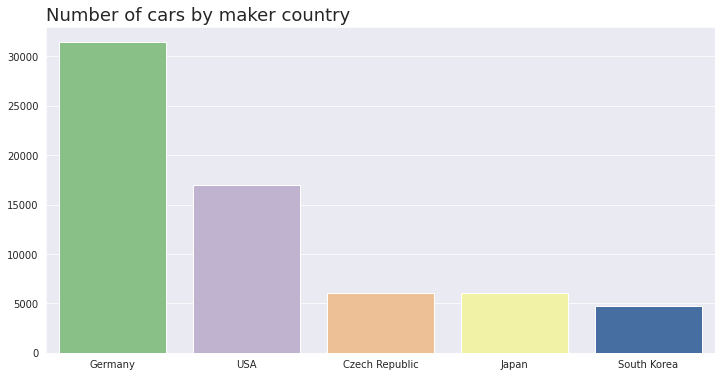

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(maker.index, maker.values)
ax.figure.set_size_inches(12,6)
ax.set_title("Number of cars by maker country", loc='left', fontsize=18)
ax = ax

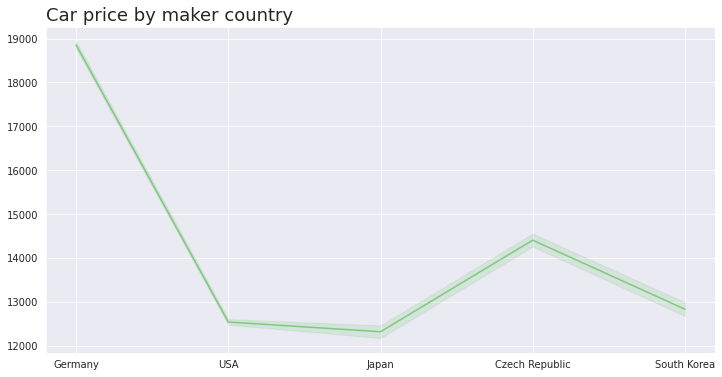

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='makerCountry', y='price', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title("Car price by maker country", loc='left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax = ax

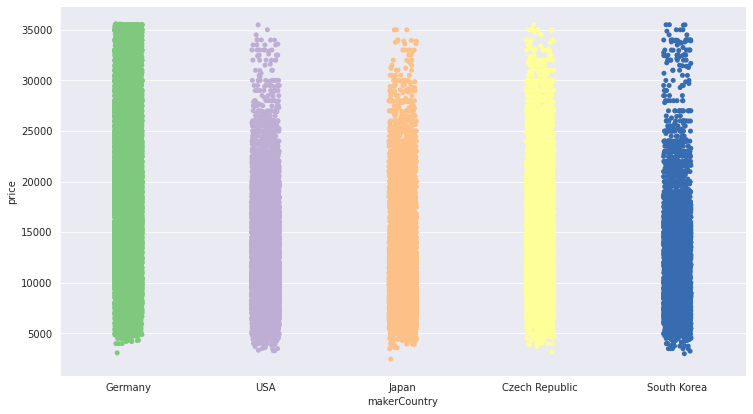

In [ ]:
ax = sns.catplot(x='makerCountry', y='price', data=df)
ax.figure.set_size_inches(12,6)

In [ ]:
df.groupby(['makerCountry']).mean()[['year', 'price', 'mpg', 'tax']].round()

,year,price,mpg,tax
makerCountry,,,,
Czech Republic,2018.0,14403.0,56.0,119.0
Germany,2017.0,18854.0,53.0,120.0
Japan,2017.0,12315.0,62.0,96.0
South Korea,2017.0,12830.0,54.0,121.0
USA,2017.0,12537.0,58.0,113.0


**Considerations**: .
<hr></hr>

##<font color='blue' style='font-size: 30px;'>8. Hypothesis tests</font>

Answers to some queries made by the customer

###<font color='blue' style='font-size: 30px;'>8.1   Is the Audi price the same as the BMW?</font>

**H<sup>null</sup>**

> **Audi prices are the same as BMW's**

**H<sup>alt</sup>**

> **The prices of the two brands are different**

In [ ]:
from scipy.stats import ranksums

In [ ]:
audi = df.query("Make == 'Audi'").price

In [ ]:
bmw = df.query("Make == 'BMW'").price

In [ ]:
r = ranksums(audi, bmw)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.554173286224722


**H<sup>null</sup>**

> **Audi's price is the same as BMW's**
<hr></hr>

###<font color='blue' style='font-size: 30px;'>8.2   Is the Toyota price the same as the Hyundai?</font>

**H<sup>null</sup>**

> **Toyota's price is the same as Hyundai's.**

**H<sup>alt</sup>**

> **The prices of the two brands are different**

In [ ]:
toyota = df.query("Make == 'Toyota'").price

In [ ]:
hyundai = df.query("Make == 'Hyundai'").price

In [ ]:
r = ranksums(toyota, hyundai)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 2.0431395156696205e-09


**H<sup>alt</sup>**

> **The prices of the two brands are different**
<hr></hr>

###<font color='blue' style='font-size: 30px;'>8.3   Is the price of the American brand the same as the Japanese one?</font>

**H<sup>null</sup>**

> **The price of the American brand is the same as the Japanese one.**

**H<sup>alt</sup>**

> **The prices of the two brands are different**

In [ ]:
usa = df.query("makerCountry == 'USA'").price

In [ ]:
japan = df.query("makerCountry == 'Japan'").price

In [ ]:
r = ranksums(usa, japan)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 2.3714742627814865e-32


**H<sup>alt</sup>**

> **The prices of the two brands are different**
<hr></hr>

##<font color='blue' style='font-size: 30px;'>9. Conclusion</font>

Based on the analyzes carried out in the database, in general, it is possible to draw a very complete profile of the British used car market:



> About the preference regarding the **age** of use of vehicles, it is possible to state that: *they prefer cars up to 5 years old, even though prices are much higher with cars up to 2 years old*;


> Regarding the **price** they are willing to pay for a used car, it is possible to say that: *they mostly like cheap cars up to $15k, but they can also pay double that in some niches*;


> Regarding the **mileage** traveled by the cars, it is possible to say that: *they don't drive their cars much, around 5,000 miles a year, so they don't like excessively driven vehicles with more than 30,000 miles either*;


> Regarding the issue of vehicle **taxes**, it is possible to state that: *is not considered a decisive factor, since the vast majority pay around $150 per year*;


> Regarding the **consumption** of automobiles, it is possible to state that: *consumption is also not an important decision factor, since there is practically a normal curve for this indicator*;



> Regarding the **engine power**, it is possible to state that: *engine power does not seduce the typical citizen, since 75% of vehicles are up to 2.0*;

> Regarding the **transmission**, it is possible to state that: *as for the transmission issue, the market is surprisingly driven by the manual transmission (3 times more used than the second place), obviously due to the cost factor, practically half the value of an automatic*;

> Regarding the **make**, it is possible to state that: *Brits like American and German cars mainly for the price factor (~50% of the total fleet is made up of Ford and Volks), but secondly for certain status of the luxury brands as well (Audi & BMW ~50% of the fleet)*;

> Regarding the **maker country**, it is possible to state that: *as for the nationality of the brand, as mentioned before, the American and German brands account for 75% of the total vehicles, even though German cars can cost more than 50% more than the others!*;


<hr></hr>